In [4]:
print(df_er.columns.tolist())


['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Condition', 'Measure ID', 'Measure Name', 'Score', 'Sample', 'Footnote', 'Start Date', 'End Date']



Top ER-Related Measures:
Measure Name
Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better                                          4035
Average (median) time patients spent in the emergency department before leaving from the visit- Psychiatric/Mental Health Patients.  A lower number of minutes is better    3017
Name: count, dtype: int64

✅ Saved: C:\Users\melod\Downloads\state_avg_er_wait_times.csv


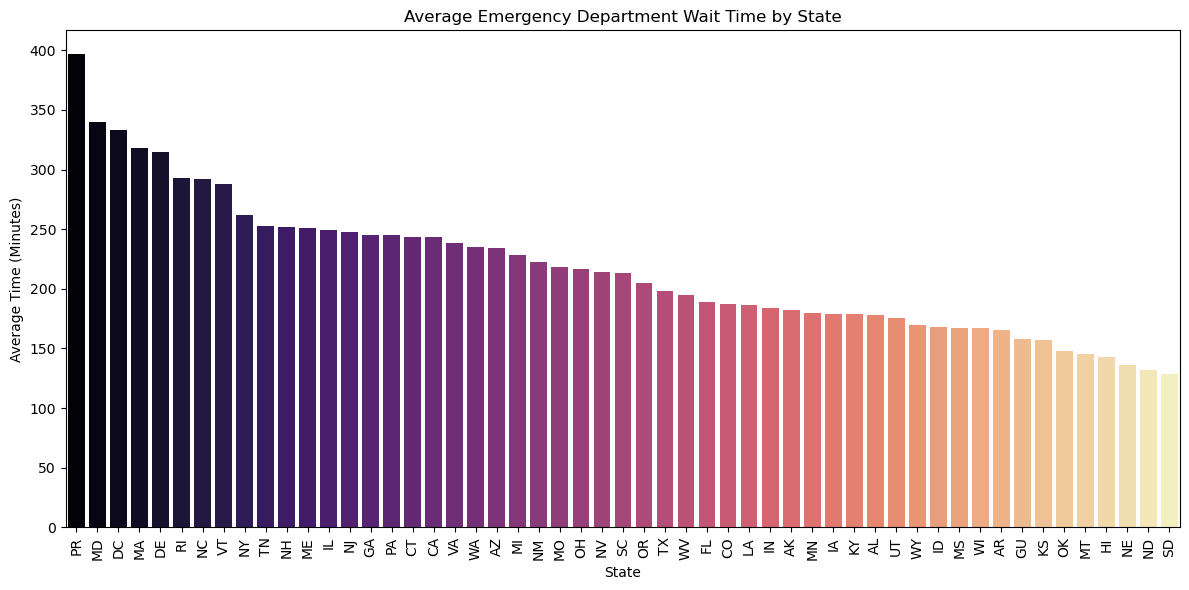

✅ Saved: C:\Users\melod\Downloads\er_wait_times_by_state.png
✅ Saved: C:\Users\melod\Downloads\top_10_slowest_hospitals.csv


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Get the current user's Downloads folder path
username = os.getlogin()
downloads_path = os.path.join("C:\\Users", username, "Downloads")

# Load the CMS dataset
csv_file = "Timely_and_Effective_Care-Hospital.csv"
df = pd.read_csv(csv_file)

# Filter for emergency department-related measures
df_er = df[df['Measure Name'].str.contains("emergency", case=False, na=False)].copy()

# Clean the Score column: convert to numeric and drop missing
df_er['Score'] = pd.to_numeric(df_er['Score'].replace("Not Available", pd.NA), errors='coerce')
df_er.dropna(subset=['Score'], inplace=True)

# Show top measure types
print("\nTop ER-Related Measures:")
print(df_er['Measure Name'].value_counts().head(5))

# Group by state to calculate average wait times
state_avg = df_er.groupby('State')['Score'].mean().reset_index().sort_values(by='Score', ascending=False)

# Save state averages to Downloads
state_avg_file = os.path.join(downloads_path, "state_avg_er_wait_times.csv")
state_avg.to_csv(state_avg_file, index=False)
print(f"\n✅ Saved: {state_avg_file}")

# Plot average wait times by state
plt.figure(figsize=(12, 6))
sns.barplot(data=state_avg, x='State', y='Score', hue='State', palette='magma', legend=False)
plt.xticks(rotation=90)
plt.title("Average Emergency Department Wait Time by State")
plt.ylabel("Average Time (Minutes)")
plt.xlabel("State")
plt.tight_layout()

# Save chart to Downloads
chart_file = os.path.join(downloads_path, "er_wait_times_by_state.png")
plt.savefig(chart_file)
plt.show()
print(f"✅ Saved: {chart_file}")

# Get top 10 hospitals with the longest wait times
top_hospitals = df_er.sort_values(by="Score", ascending=False)[
    ['Facility Name', 'State', 'Measure Name', 'Score']
].head(10)

# Save top 10 hospitals to Downloads
top10_file = os.path.join(downloads_path, "top_10_slowest_hospitals.csv")
top_hospitals.to_csv(top10_file, index=False)
print(f"✅ Saved: {top10_file}")
